In [322]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, tree, model_selection
import pandas as pd
%matplotlib inline

In [2]:
wine = datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [62]:
wine_data = pd.DataFrame(wine.data, columns= wine.feature_names)
wine_target = pd.DataFrame(wine.target, columns = ['WineClass'])
wine_data.shape, wine_target.shape

((178, 13), (178, 1))

In [31]:
wine_df = pd.concat([wine_data,wine_target], axis = 1)

In [32]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,WineClass
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [20]:
#wine.target_names class_1 =0 , class_2 = 1, class_3 = 2

In [35]:
'''wine_df.info()
wine_df.describe()'''

'wine_df.info()\nwine_df.describe()'

#### creating the feature and target variables

In [36]:
X = wine_df.drop('WineClass', axis = 1)

In [38]:
y = wine_df['WineClass']

## using the DecisionTreeClassifier model

In [40]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, y_train, y_test = \
train_test_split(X,y, random_state = 42, stratify = y, test_size = 0.2)

In [71]:
#proportion of y_train, y_test and y before stratifying
print(f'yTest 0 ,1, 2: \n{np.bincount(y_test)/float(len(y_test)) * 100.0}')
print(f'yTrain 0, 1 ,2: \n {np.bincount(y_train)/float(len(y_train)) * 100.0}')
print(f'yTrain 0, 1 ,2: \n {np.bincount(y)/float(len(y)) * 100.0}')

Test 0 ,1, 2,
[38.88888889 44.44444444 16.66666667]
Train 0, 1 ,2, 
 [31.69014085 38.73239437 29.57746479]
Train 0, 1 ,2, 
 [33.14606742 39.88764045 26.96629213]


In [73]:
#proportion of y_train, y_test and y after stratifying
print(f'Test 0 ,1, 2,\n{np.bincount(y_test)/float(len(y_test)) * 100.0}')
print(f'Train 0, 1 ,2, \n {np.bincount(y_train)/float(len(y_train)) * 100.0}')
print(f'Train 0, 1 ,2, \n {np.bincount(y)/float(len(y)) * 100.0}')

Test 0 ,1, 2,
[33.33333333 38.88888889 27.77777778]
Train 0, 1 ,2, 
 [33.09859155 40.14084507 26.76056338]
Train 0, 1 ,2, 
 [33.14606742 39.88764045 26.96629213]


In [48]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
classifier = DecisionTreeClassifier(random_state = 42)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [154]:
wine_predict = classifier.predict(X_test)
wine_predict

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2])

In [155]:
np.where(wine_predict == y_test)[0].size

34

In [156]:
np.where(wine_predict != y_test)[0].size

2

In [157]:
test_accuracy = classifier.score(X_test, y_test)
test_accuracy

0.9444444444444444

In [158]:
train_accuracy = classifier.score(X_train, y_train)
train_accuracy

1.0

## checking the best test size to split to obtain the best accuracy

In [357]:
# %load DecisionTreeAccuracy_Function
#checks the test size split with the best accuracy

def DecisionTree_accuracy(n, testAcc):
    testsize = np.round(np.linspace(0.2,0.4, 5),2)
    testAcc = np.empty(len(testsize))
    for i, n in enumerate(testsize):
        X_train, X_test, y_train, y_test = \
        train_test_split(X,y, random_state = 42, stratify = y, test_size = n)
        classifier = DecisionTreeClassifier(random_state = 42)
        classifier.fit(X_train,y_train)
        classifier.predict(X_test)
        testAcc[i] = classifier.score(X_test,y_test)
        print(f'The accuracy of when testsize is {n} is {np.round((testAcc[i]),3)}',)
        
    plt.figure(figsize=(8, 5), frameon=True)
    plt.title("Test_size: Varying splits of Test_sizes")
    plt.plot(testsize,testAcc, 'cx-', markersize= 9, zorder = 2.0, label = 'Accuracy' )
    plt.legend()
    plt.xlabel('Fraction of test size')
    plt.ylabel('Accuracy');

The accuracy of when testsize is 0.2 is 0.944
The accuracy of when testsize is 0.25 is 0.956
The accuracy of when testsize is 0.3 is 0.963
The accuracy of when testsize is 0.35 is 0.984
The accuracy of when testsize is 0.4 is 0.972


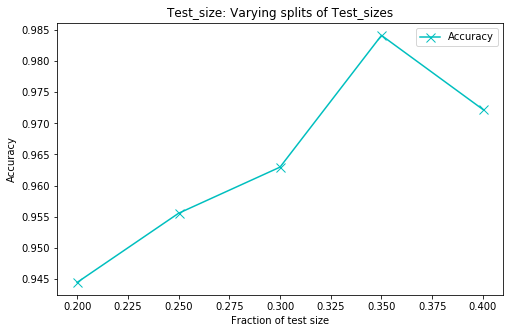

In [358]:
#calling the function
DecisionTree_accuracy(n,testAcc)

## Using the KNeighborsClassifier model

In [147]:
from sklearn.neighbors import KNeighborsClassifier

In [160]:
knn = KNeighborsClassifier(n_neighbors= 5)

In [161]:
knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test)

In [162]:
#checking the accuracy
testaccuracy = knn.score(X_test,y_test)
testaccuracy

0.8055555555555556

In [163]:
trainaccuracy = knn.score(X_train,y_train)
trainaccuracy

0.7816901408450704

### plotting the best KNN number

In [295]:
# %load KNeighbors_Accuracyfunction.py
def KNeighbour_Accuracy(n):
    neighbors = np.arange(1, 11,)
    accuracy_train = np.empty(len(neighbors))
    accuracy_test = np.empty(len(neighbors))

    for i, n in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)
        accuracy_test[i] = knn.score(X_test, y_test)  # individual test_accuracy score for every n looped
        accuracy_train[i] = knn.score(X_train, y_train)  # individual train_accuracy score for every n looped

    # plt.style.use('classic')
    plt.figure(figsize=(8, 5), frameon=True)
    plt.title("KNN: Varying Number of Neigbours")
    plt.plot(neighbors, accuracy_train, 'rs-', label='Train Accuracy')
    plt.plot(neighbors, accuracy_test, 'go-', label='Test Accuracy', )
    plt.legend()
    plt.xlabel('Number of Neighbours')
    plt.ylabel('Accuracy');


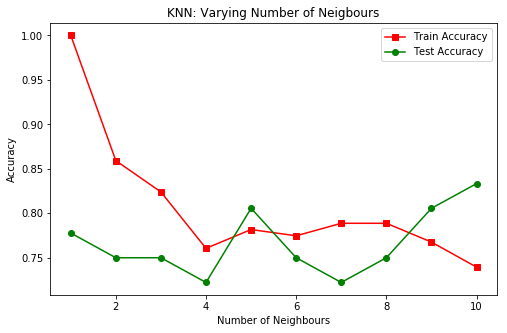

In [296]:
KNeighbour_Accuracy(n)

In [333]:
neighbors = np.arange(1, 11,)
testAcc = np.empty(len(neighbors))
#testsize =  np.round(np.linspace(0.2,0.4, 5),2)
kneighbors = []
accuracy = []
numdict = {}
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    testAcc[i] = knn.score(X_test,y_test)
    numdict[k] = np.round(testAcc[i],3)
    kneighbors.append(k)
    accuracy.append(testAcc[i])
  
    print(f'Accuracy when n_neighbors is {(k)} is {np.round(np.max((testAcc[i])),3)}')


Accuracy when n_neighbors is 1 is 0.778
Accuracy when n_neighbors is 2 is 0.75
Accuracy when n_neighbors is 3 is 0.75
Accuracy when n_neighbors is 4 is 0.722
Accuracy when n_neighbors is 5 is 0.806
Accuracy when n_neighbors is 6 is 0.75
Accuracy when n_neighbors is 7 is 0.722
Accuracy when n_neighbors is 8 is 0.75
Accuracy when n_neighbors is 9 is 0.806
Accuracy when n_neighbors is 10 is 0.833


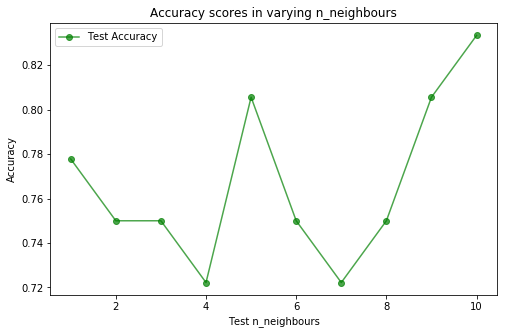

In [359]:
plt.figure(figsize = [8,5])
plt.plot(kneighbors,accuracy, 'go-', alpha = 0.7,label = 'Test Accuracy')
plt.legend(loc = 'upper left')
plt.title('Accuracy scores in varying n_neighbours')
plt.xlabel('Test n_neighbours')
plt.ylabel('Accuracy');

#### From the two model used we could see that the Knearestnieghbors isn't the best model to predict the classes of wine, as its accuracy is btw 0.75 and 0.833

#### The DecisionTree classifier seems to be the best model to predict it, as its accuracy ranges from 0.944 to 0.984